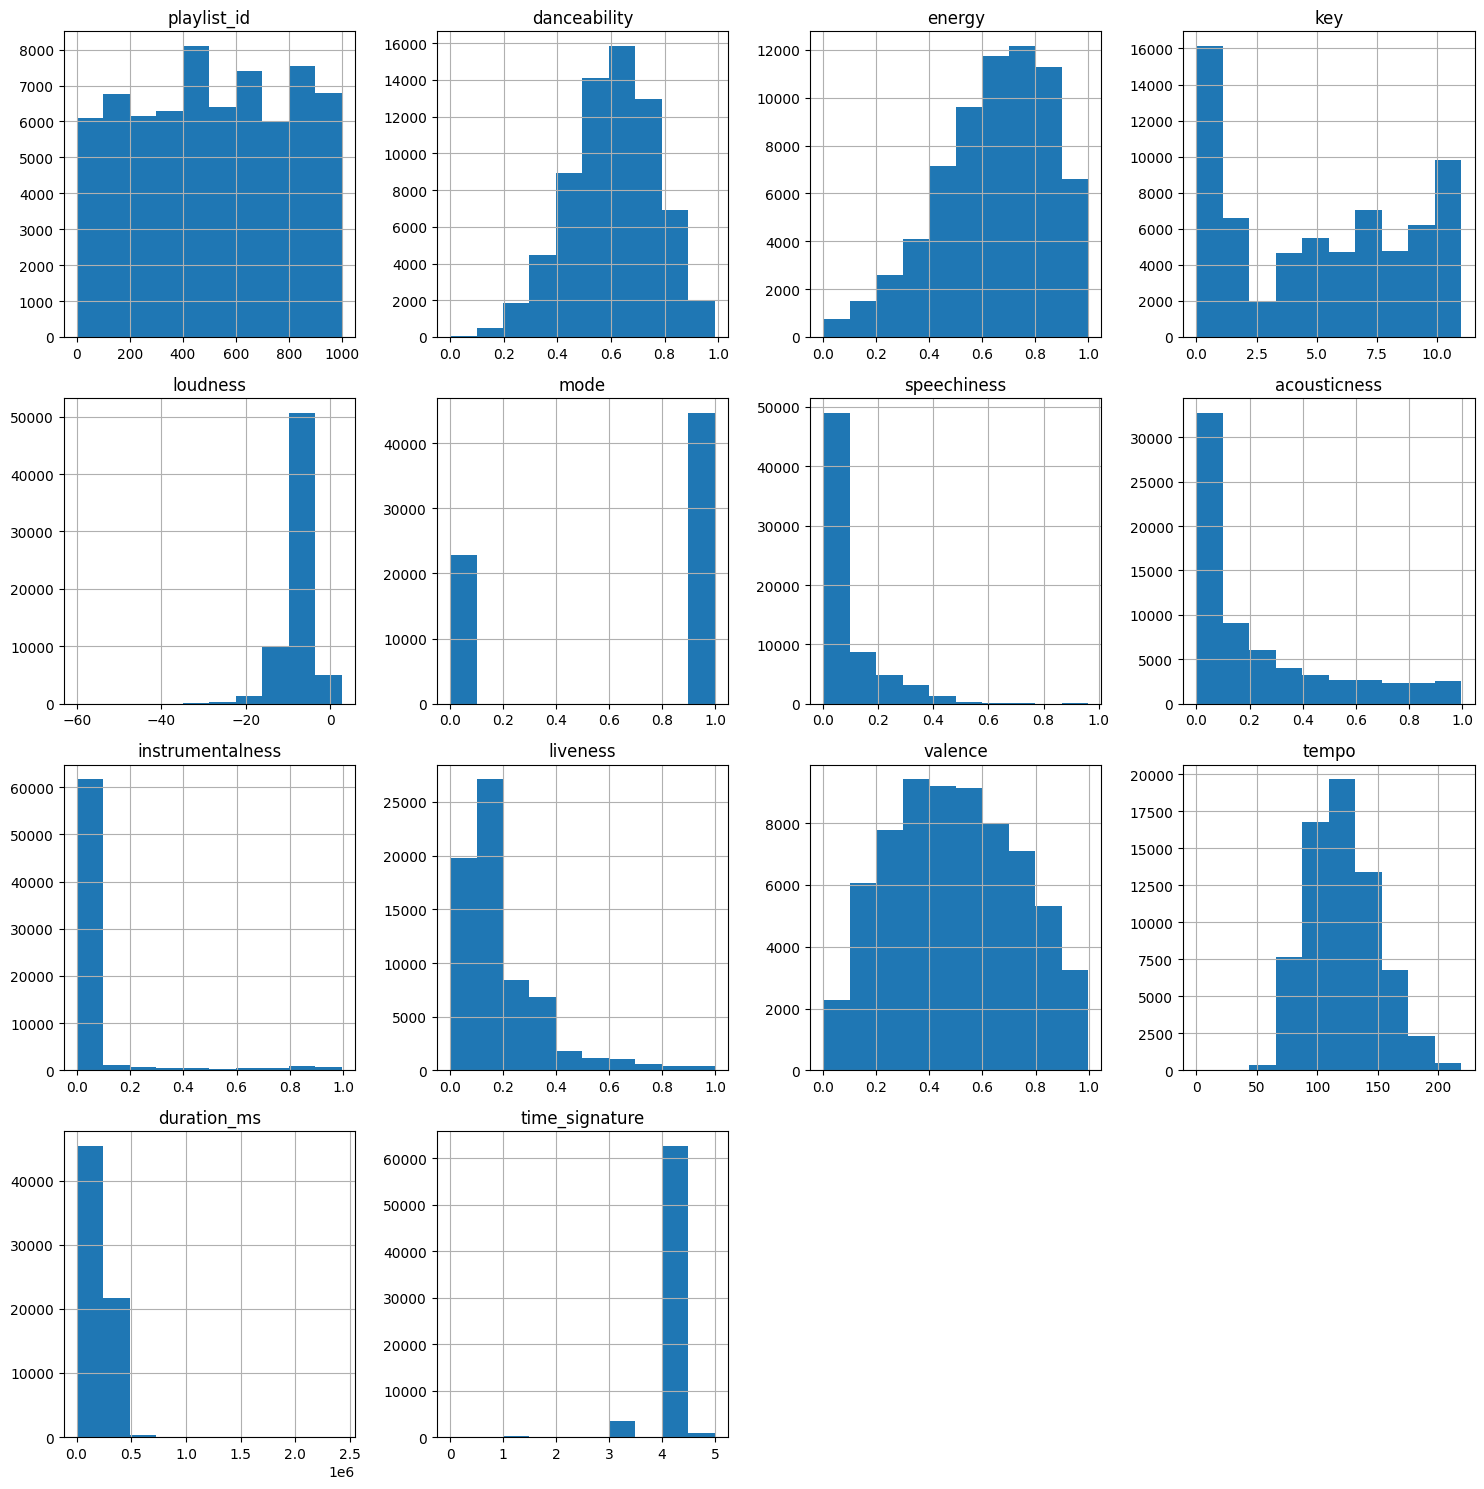

<Figure size 640x480 with 0 Axes>

In [1]:
# import necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create dataframe from .csv file
aud_features = pd.read_csv("p_audio_features_0-999.csv")

# drop non-numerical features
features = aud_features.drop(['Unnamed: 0', 'Unnamed: 0.1', 'type', 'id', 'uri', 'track_href','analysis_url'], axis='columns')

# display histograms of audio features
features.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

plt.savefig('data_vis.png')

In [33]:
# verifying for null values in the data set and if found, remove from data set
features.dropna()

# searching for amount of unique tracks within the data set
u_tracks = aud_features['id'].unique().shape[0]
print(f"There are {u_tracks} unique tracks within the data set.")

# based on the histograms displayed above, removing features 'mode' and 'time_signature' as their distributions are sparse
features = features.drop(['key', 'mode', 'time_signature', 'liveness'], axis='columns')

There are 34443 unique tracks within the data set.


In [34]:
# create copy of dataframe for exploratory data analysis and feature engineering
features_copy = features.copy()

In [35]:
# import min-max scaler
from sklearn.preprocessing import MinMaxScaler

# initialize Min-Max Scaler
mmScaler = MinMaxScaler()

# scaling features that contain float values
sc_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo', 'valence']

# conduct min-max scaling
features_copy[sc_features] = mmScaler.fit_transform(features_copy[sc_features])
features_copy.head()

,playlist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms
0,0,0.914980,0.813,0.842733,0.125780,0.031225,0.007005,0.811623,0.572105,226864
1,0,0.783401,0.838,0.893573,0.118503,0.025000,0.025126,0.925852,0.652266,198800
2,0,0.672065,0.758,0.851050,0.218295,0.002390,0.000000,0.702405,0.452624,235933
3,0,0.902834,0.714,0.859462,0.146570,0.201807,0.000235,0.818637,0.460435,267267
4,0,0.863360,0.606,0.882707,0.074116,0.056325,0.000000,0.655311,0.432103,227600


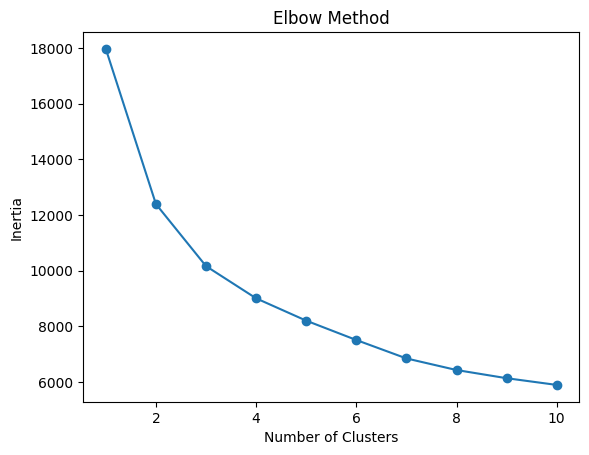

<Figure size 640x480 with 0 Axes>

In [36]:
# import k-means clustering
from sklearn.cluster import KMeans

# create dataframe for k-means clustering
k_features = features_copy.loc[:, sc_features]
# print(k_features[:10])

# elbow method to determine number of k clusters
data = k_features.values
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

plt.savefig('elbow.png')

In [40]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(data)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

f_clusters = pd.DataFrame(centers, columns=sc_features)
f_clusters['cluster'] = ['KM{}'.format(label) for label in np.unique(labels)]
f_clusters

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,cluster
0,0.053192,0.508486,0.832403,0.012083,0.875317,0.093333,0.609804,0.429668,KM0
1,0.537853,0.658849,0.587605,0.010683,0.830082,0.113938,0.542822,0.653404,KM1
2,0.771891,0.498354,0.311801,0.016740,0.774339,0.063539,0.520217,0.294234,KM2
3,0.098058,0.768378,0.605444,0.006441,0.845143,0.162673,0.527719,0.486837,KM3
4,0.858639,0.404380,0.252781,0.810717,0.690864,0.045554,0.502894,0.247617,KM4
5,0.175151,0.563160,0.546688,0.013730,0.834197,0.081624,0.550306,0.232737,KM5
6,0.098248,0.690745,0.778405,0.009050,0.863665,0.090336,0.553909,0.785760,KM6
7,0.101631,0.572067,0.731059,0.724876,0.835056,0.063428,0.572341,0.441379,KM7


In [44]:
# labeling each track to their predicted genres based on the values from the center clusters
pred_genres = ['EDM', 'Acoustic Folk', 'Ambient', 'Dance Pop', 'Classical', 'Contemporary Pop/R&B', 'Festival House', 'Electro Pop']
new_labels = dict(zip(np.unique(labels), pred_genres))
features_copy['Label'] = list(map(lambda x : new_labels[x], labels))
features_copy.head()

,playlist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,Label,x,y
0,0,0.914980,0.813,0.842733,0.125780,0.031225,0.007005,0.811623,0.572105,226864,Festival House,-0.408325,0.252460
1,0,0.783401,0.838,0.893573,0.118503,0.025000,0.025126,0.925852,0.652266,198800,Festival House,-0.453502,0.295431
2,0,0.672065,0.758,0.851050,0.218295,0.002390,0.000000,0.702405,0.452624,235933,Festival House,-0.319609,0.091085
3,0,0.902834,0.714,0.859462,0.146570,0.201807,0.000235,0.818637,0.460435,267267,Festival House,-0.230028,0.345183
4,0,0.863360,0.606,0.882707,0.074116,0.056325,0.000000,0.655311,0.432103,227600,Dance Pop,-0.213736,0.141581


<Figure size 1600x1600 with 0 Axes>

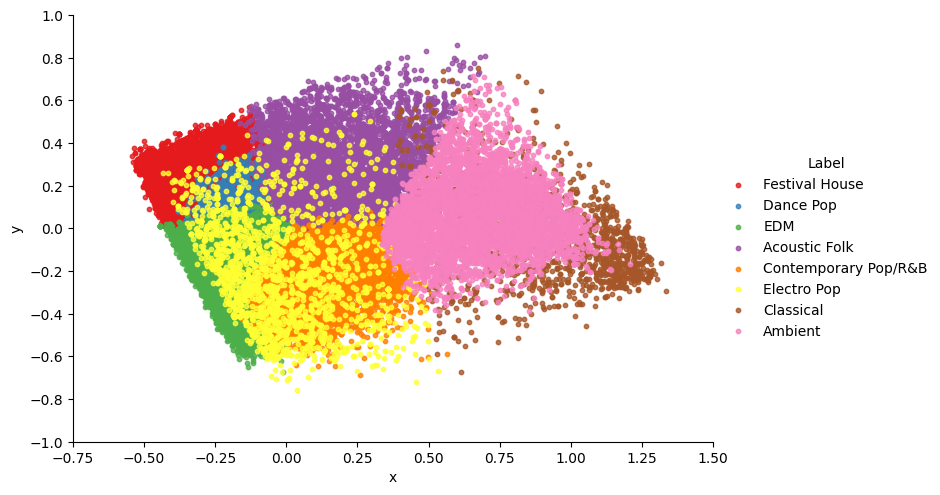

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
f_2d = pca.fit_transform(data)
# x, y = zip(*f_2d)
features_copy['x'] = f_2d[:, 0]
features_copy['y'] = f_2d[:, 1]

# pred = kmeans.predict(data)

plt.figure(figsize=(16, 16))
lm = sns.lmplot(data=features_copy, x='x', y='y', hue='Label', fit_reg=False, legend=True, aspect=1.5, palette='Set1', scatter_kws={'alpha': 0.8, 's': 10})
lm.set_xticklabels(fontsize=10)
lm.set_yticklabels(fontsize=10)
# plt.scatter(features_copy['x'], features_copy['y'], c=pred)
# plt.show()

plt.savefig('genre_clusters.png')